In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 5.0 MB/s eta 0:00:00


In [16]:
import cv2
from ultralytics import YOLO
model=YOLO('yolov8n.pt')
result=model.predict("https://cdn.thebilliards.kr/news/photo/202308/21437_22429_242.jpg")

100%|██████████| 125k/125k [00:01<00:00, 127kB/s]


image 1/1 /content/21437_22429_242.jpg: 448x640 4 persons, 264.2ms
Speed: 6.1ms preprocess, 264.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


In [17]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
### data자료만 꺼내서, 마지막의 값이 0인 Person인 class 자료만 박스를 그리기
### 단, 5번째 인데그 값이 0.50 이상인 값만 박스 그리기
### 직접 박스를 그리는 명령어를 실행해야 함
### cv2보다는 PILLOW가 편함

In [18]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0.])
conf: tensor([0.9074, 0.7617, 0.7164, 0.7069])
data: tensor([[3.5506e+00, 1.1292e+00, 2.7590e+02, 5.2568e+02, 9.0735e-01, 0.0000e+00],
        [4.0790e+02, 4.0494e+00, 7.7790e+02, 5.2651e+02, 7.6174e-01, 0.0000e+00],
        [2.3948e+02, 1.1901e+01, 4.2772e+02, 5.2204e+02, 7.1636e-01, 0.0000e+00],
        [2.4075e+02, 1.2648e+01, 5.3439e+02, 5.2667e+02, 7.0692e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (533, 800)
shape: torch.Size([4, 6])
xywh: tensor([[139.7275, 263.4031, 272.3537, 524.5478],
        [592.8972, 265.2808, 370.0009, 522.4626],
        [333.5999, 266.9720, 188.2390, 510.1416],
        [387.5690, 269.6581, 293.6462, 514.0200]])
xywhn: tensor([[0.1747, 0.4942, 0.3404, 0.9841],
        [0.7411, 0.4977, 0.4625, 0.9802],
        [0.4170, 0.5009, 0.2353, 0.9571],
        [0.4845, 0.5059, 0.3671, 0.9644]])
xyxy: tensor([[  3.5506,   1.1292, 275.9043, 525.6770],
        [407.8967

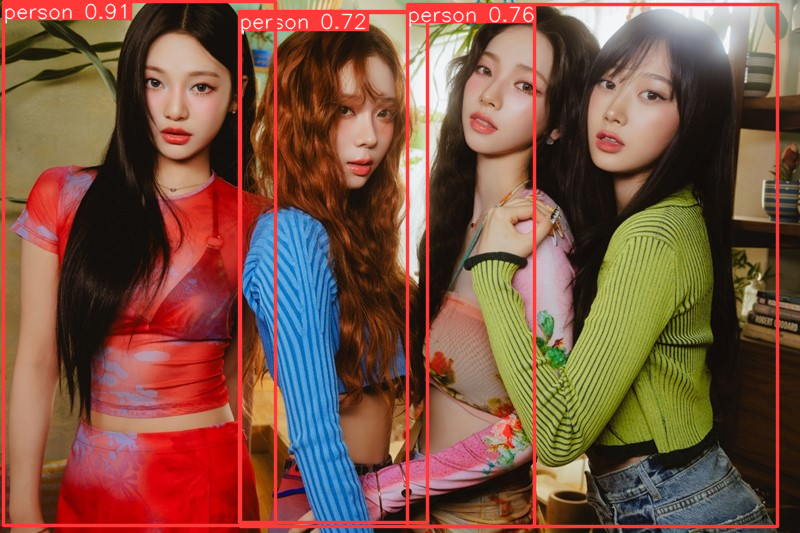

In [19]:
from google.colab.patches import cv2_imshow

img = result[0].plot()
cv2_imshow(img)

In [43]:
from PIL import Image, ImageDraw

img = Image.open('/content/21437_22429_242.jpg').convert('RGB')
img.show()

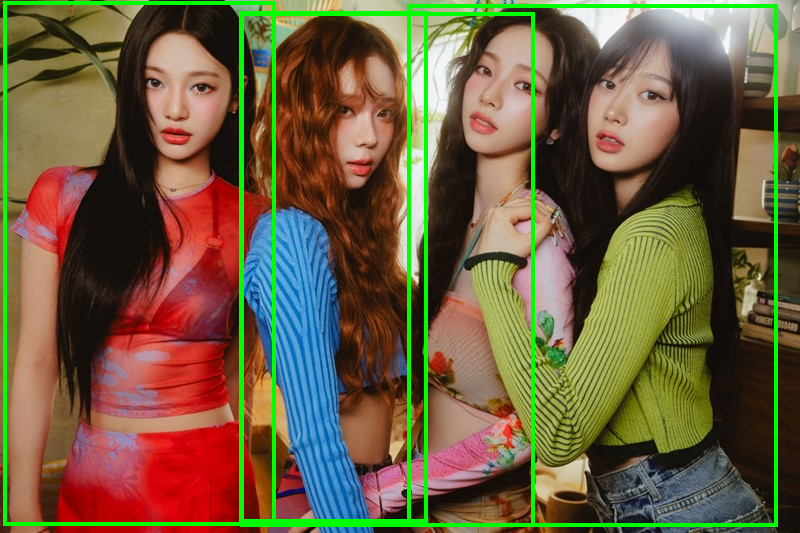

In [47]:
# ImageDraw 객체 생성
draw = ImageDraw.Draw(img)

# 박스 데이터 추출
data = [
    [3.5506, 1.1292, 275.9043, 525.6770, 0.9074, 0.0],
    [407.8967, 4.0494, 777.8976, 526.5121, 0.7617, 0.0],
    [239.4803, 11.9012, 427.7193, 522.0428, 0.7164, 0.0],
    [240.7459, 12.6480, 534.3922, 526.6681, 0.7069, 0.0]
]

# 박스 그리기
for box in data:
    if box[5] == 0.0 and box[4] >= 0.50:  # 클래스가 "Person"이고, confidence 값이 0.50 이상인 경우
        draw.rectangle((box[0], box[1], box[2], box[3]), outline=(0, 255, 0), width=4)

# 이미지 표시
img

In [49]:
import csv

# CSV 파일 경로
csv_file_path = "data.csv"

# CSV 파일 작성
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x1', 'y1', 'x2', 'y2', 'confidence', 'class'])
    for row in data:
        writer.writerow(row)